# Linear models with both numeric and factor explanatory variables

本节需要的包：


In [1]:
require(s20x)


载入需要的程辑包：s20x

Warning message:
"程辑包's20x'是用R版本4.2.3 来建造的"


## Example: Using both test score and attendance to explain exam score

示例：使用测试成绩和出勤率解释考试分数


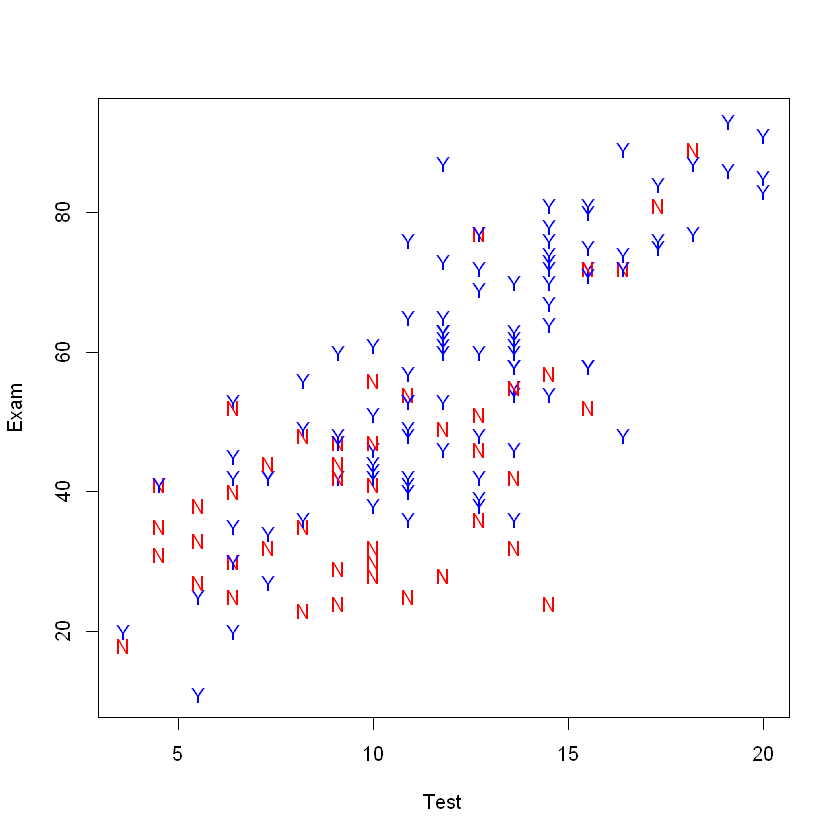

In [2]:
## Invoke the s20x library
library(s20x)
## Importing data into R
Stats20x.df <- read.table("../data/STATS20x.txt", header = TRUE)
Stats20x.df$Attend <- as.factor(Stats20x.df$Attend)
## Plot blue "Y" for "Yes" (regular attenders), and red "N" for "No"
plot(Exam ~ Test,
    data = Stats20x.df,
    pch = substr(Attend, 1, 1), # "Y" or "N"
    col = ifelse(Attend == "Yes", "blue", "red")
)


Here is the plot for the regular attenders and the non-attenders.

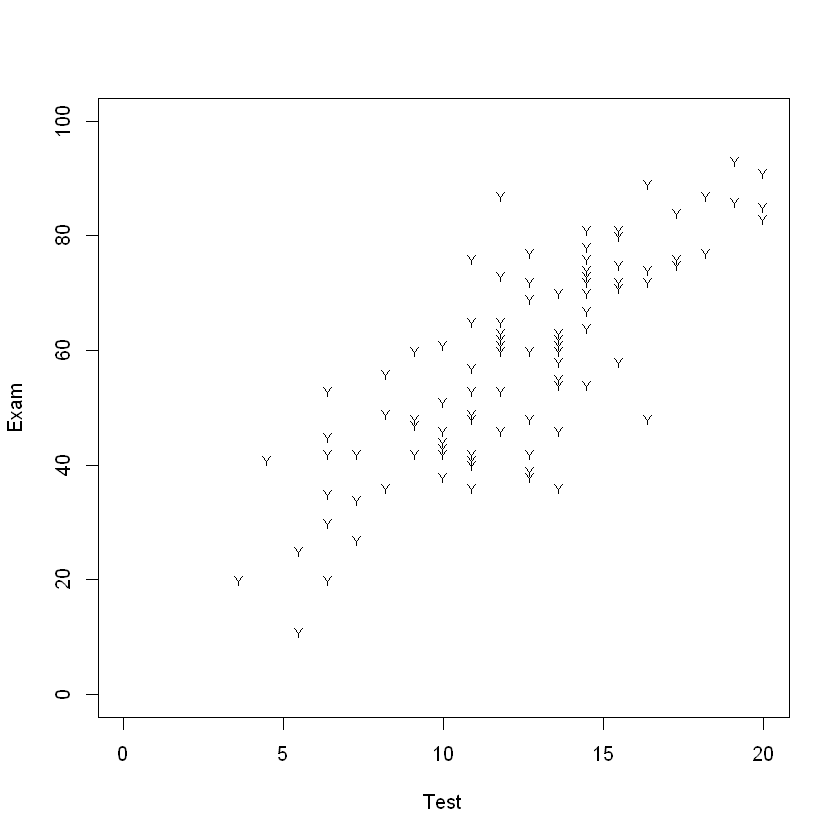

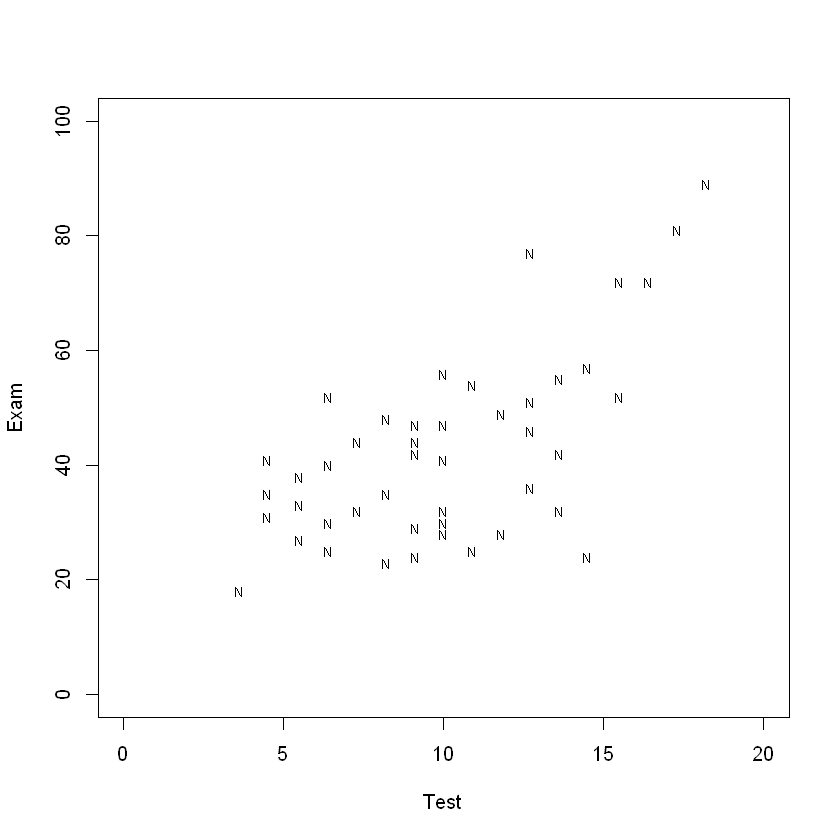

In [3]:
Attendees.df <- subset(Stats20x.df, Attend == "Yes")
plot(Exam ~ Test,
    data = Attendees.df,
    xlim = c(0, 20),
    ylim = c(0, 100),
    pch = "Y", cex = 0.7
)
Absentees.df <- subset(Stats20x.df, Attend == "No")
plot(Exam ~ Test,
    data = Absentees.df,
    xlim = c(0, 20),
    ylim = c(0, 100),
    pch = "N",
    cex = 0.7
)


Also, there seems to be some non-attenders who do well in the test and exam so we could (and will) see whether we should include these people. They are identified in red (stars) with the code below. 此外，似乎有一些没有参加考试的人在考试和考试中表现很好，所以我们可以(也将)看看是否应该包括这些人。它们用红色(星号)标识，代码如下。


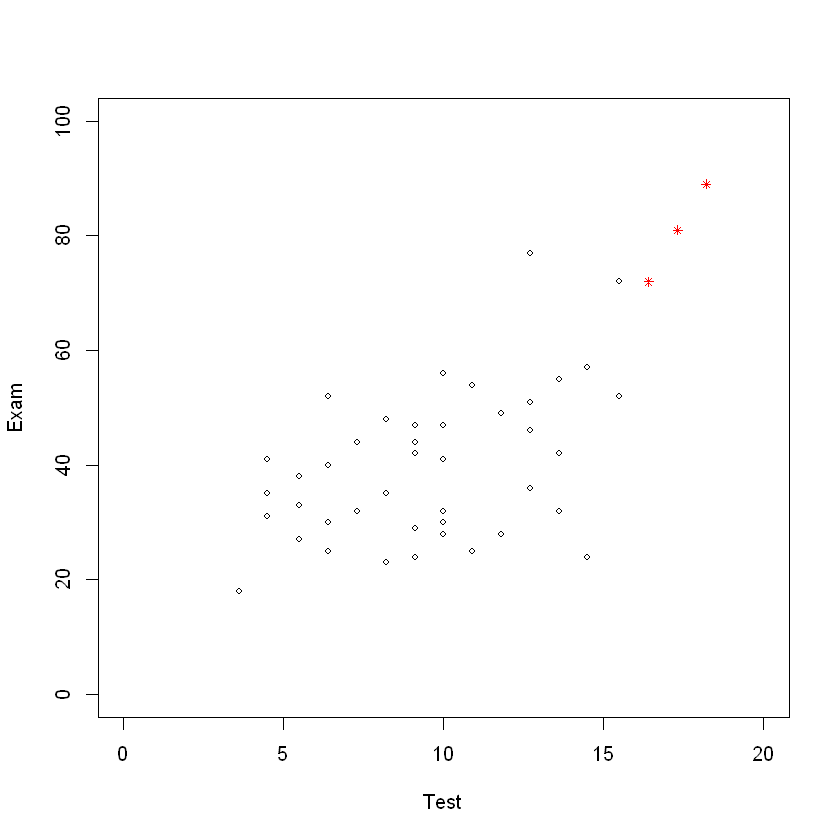

In [4]:
Absentees.df <- subset(Stats20x.df, Attend == "No")
plot(Exam ~ Test,
    data = Absentees.df, xlim = c(0, 20), ylim = c(0, 100),
    cex = 0.7, col = ifelse(Absentees.df$Test <= 16, "black", "red"),
    pch = ifelse(Absentees.df$Test <= 16, 1, 8)
)


## Fitting the linear model

看起来我们需要符合两个不同取决于学生是否经常出席者。

We will call our indicator variable for greater convenience of notation: 我们将为了方便表示法而称之为指示变量：


In [5]:
## Boolean statement if Attend ="Yes" (TRUE) D=1, othwerwise 0 (FALSE);
Stats20x.df$D <- as.numeric(Stats20x.df$Attend == "Yes")
table(Stats20x.df$Attend, Stats20x.df$D) ## Check it is okay


     
        0   1
  No   46   0
  Yes   0 100

相当于说，No 为 0，Yes 为 1。

Our straight line model for the non-attenders (i.e., D = 0) students will be:

$$
Exam = β_0 + β_1 \times Test + ε\ where\ ε \sim N(0,σ^2)
$$

For the non-attenders (D = 0) the slope(斜率) is:

$$
β_1 + D \times β_2 = β_1
$$

For the attenders (D = 1) the slope is:

$$
β_1 + D \times β_3 = β_1 + β_3
$$

So, our model is:

$$
\begin{aligned}\text{Exam}&=\beta_0+\beta_2\times D+(\beta_1+\beta_3\times D)\text{Test}+\varepsilon\\
&=(\beta_0+\beta_2\times D)+(\beta_1+\beta_3\times D)\text{Test}+\varepsilon\\
&=\beta_0+\beta_1\times\text{Test}+\beta_2\times D+\beta_3\times D\times\text{Test}+\varepsilon\end{aligned}
$$

建模：


In [6]:
Stats20x.df$TestD <- with(Stats20x.df, {
    TestD <- D * Test
})
TestAttend.fit <- lm(Exam ~ Test + D + TestD, data = Stats20x.df)


Assumption checks 三步走:


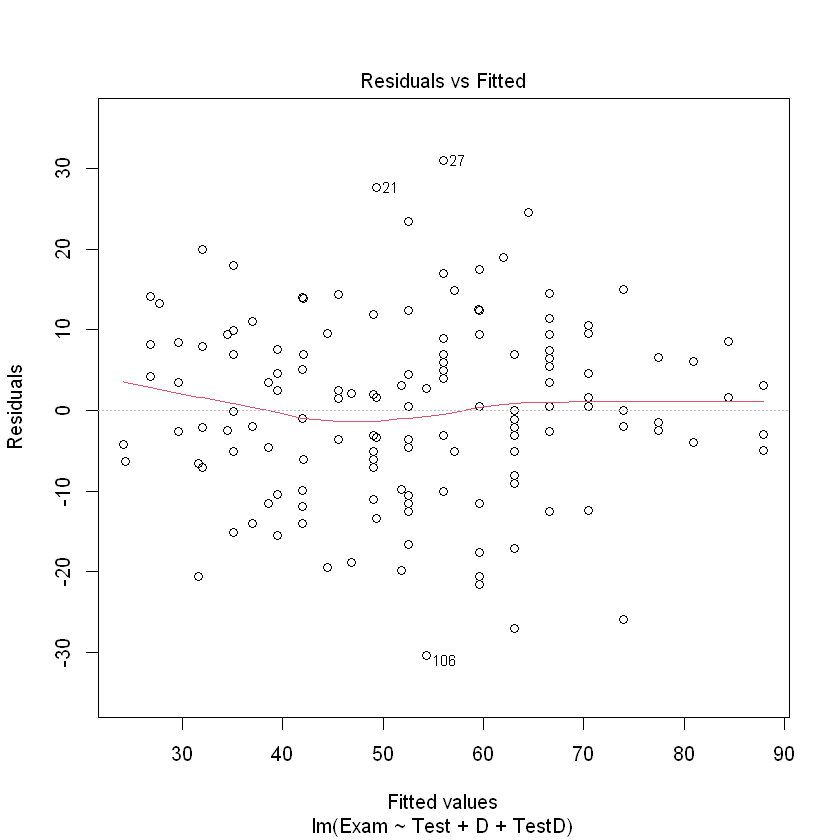

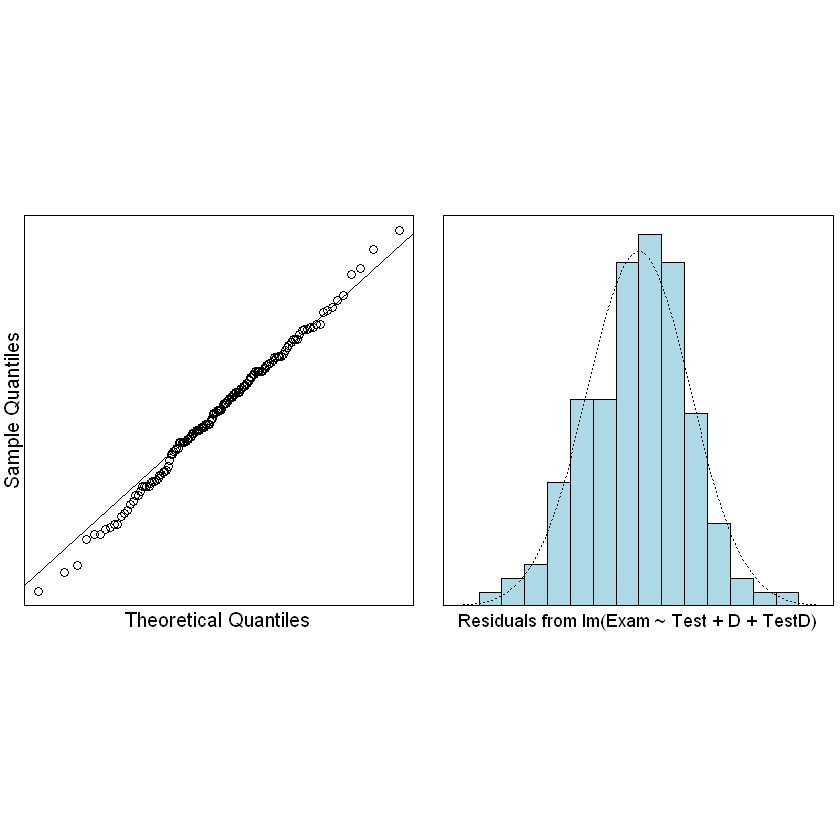

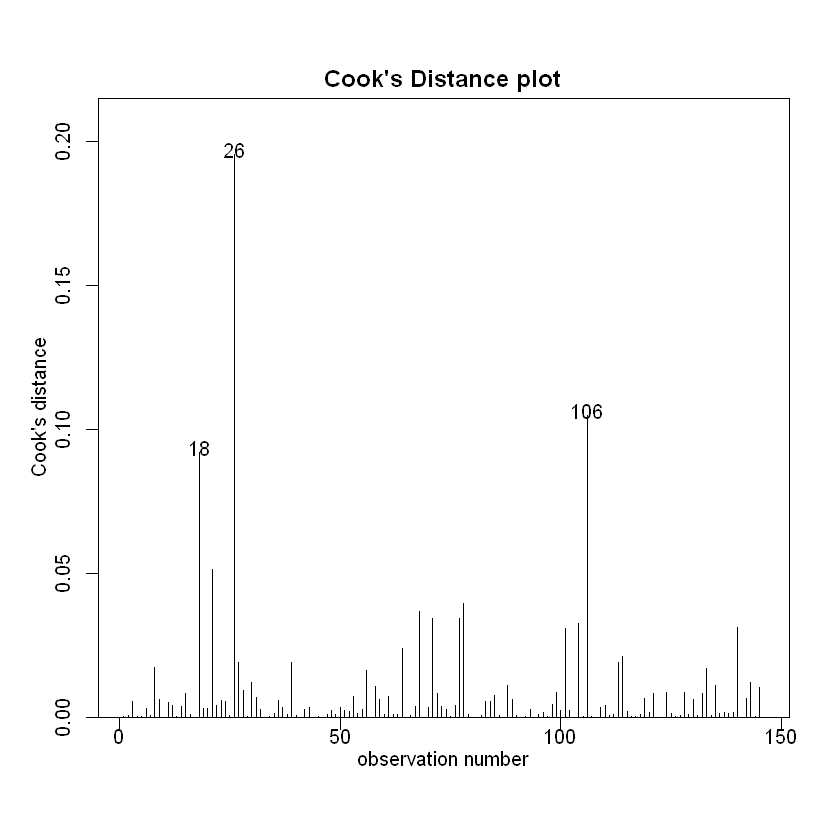

In [7]:
plot(TestAttend.fit, which = 1)
normcheck(TestAttend.fit)
cooks20x(TestAttend.fit)


We can now trust the fitted . The summary output is:

In [8]:
summary(TestAttend.fit)



Call:
lm(formula = Exam ~ Test + D + TestD, data = Stats20x.df)

Residuals:
     Min       1Q   Median       3Q      Max 
-30.3155  -6.5139   0.4383   7.3166  30.9383 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  14.4467     4.9443   2.922  0.00405 ** 
Test          2.7496     0.4603   5.973 1.78e-08 ***
D            -4.2582     6.3723  -0.668  0.50506    
TestD         1.1380     0.5577   2.040  0.04316 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 11.41 on 142 degrees of freedom
Multiple R-squared:  0.6347,	Adjusted R-squared:  0.627 
F-statistic: 82.25 on 3 and 142 DF,  p-value: < 2.2e-16


Note that the above Executive Summary is missing the confidence interval for the effect of test mark on attenders. To obtain this CI we need to change attenders to the baseline level of . 改变了基准线

让我们仔细看看我们刚刚安装模式。我们将会产生一个单独的情节为每个出席者。

In [9]:
coef(TestAttend.fit)[1:2]
# 分别为截距 和 Test 的系数


(Intercept)        Test 
  14.446750    2.749568

将我们的模型放到图上：

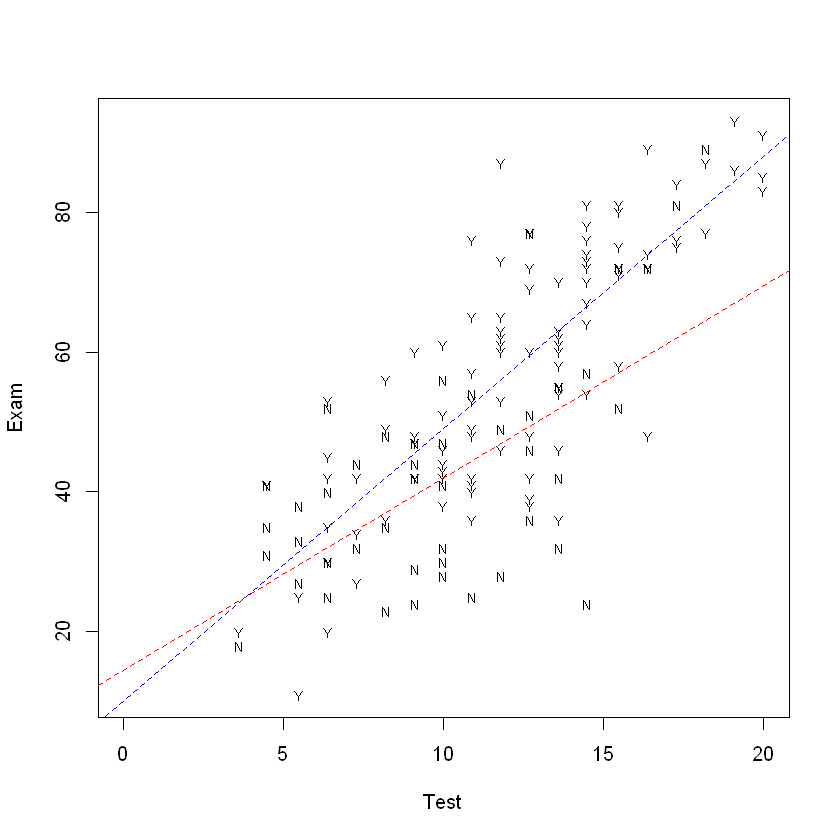

In [10]:
## Plot these data all together
b <- coef(TestAttend.fit) # easier to work with these terms
plot(Exam ~ Test,
    data = Stats20x.df,
    pch = substr(Attend, 1, 1), # "Y" or "N"
    cex = 0.7, # 缩放，默认为 1
    xlim = c(0, 20) # x 轴范围
)
## Red for "No" and blue for "Yes".
abline(b[1:2], lty = 2, col = "red")
# No 群体：beta0 做截距，beta1 做斜率
abline(b[1] + b[3], b[2] + b[4], lty = 2, col = "blue")
# Yes群体：beta0 + beta2 做截距，beta1 + beta3 做斜率


All that hard work we did with constructing and can be avoided D TestD since will automatically do this for us.

We were interested to see whether the effect of interacts with the Test students variable. Using we simply specify to Attend lm Test * Attend fit the model with interaction. That is,

In [11]:
TestAttend.fit2 = lm(Exam ~ Test * Attend, data = Stats20x.df)
summary(TestAttend.fit2)



Call:
lm(formula = Exam ~ Test * Attend, data = Stats20x.df)

Residuals:
     Min       1Q   Median       3Q      Max 
-30.3155  -6.5139   0.4383   7.3166  30.9383 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     14.4467     4.9443   2.922  0.00405 ** 
Test             2.7496     0.4603   5.973 1.78e-08 ***
AttendYes       -4.2582     6.3723  -0.668  0.50506    
Test:AttendYes   1.1380     0.5577   2.040  0.04316 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 11.41 on 142 degrees of freedom
Multiple R-squared:  0.6347,	Adjusted R-squared:  0.627 
F-statistic: 82.25 on 3 and 142 DF,  p-value: < 2.2e-16


We have the same outputs, but with slightly different names.

注意: `Test * Attend` 是速记符号。你可以用下边的写法更明确关于模型中各个方面：

```r
TestAttend.fit2 <- lm(Exam ~ Test + Attend + Test:Attend, data = Stats20x.df)
```

## Interpretting the fitted model

We see that our intuition was correct. That is, the slope for of Test attenders is greater that for non-attenders. This is because the estimate of the difference in these slopes `TestD`.

In [13]:
coef(TestAttend.fit2)[4]


Test:AttendYes 
       1.13799

Confidence intervals may be needed for the coefficients:

In [14]:
confint(TestAttend.fit2)


,2.5 %,97.5 %
(Intercept),4.67287511,24.220625
Test,1.83956971,3.659567
AttendYes,-16.85506294,8.338572
Test:AttendYes,0.03547053,2.240510


注：Statistical significance (at the 5% level) of a coefficient is NOT equivalent to the (95%) confidence interval containing zero. 统计学意义(5%)的系数并不等同于(95%)置信区间包含零。

Some predictions:

In [16]:
predTestAttend.df <- data.frame(
    Test = c(0, 10, 10, 20),
    Attend = factor(c("No", "No", "Yes", "Yes"))
)
predTestAttend.df


Test,Attend
<dbl>,<fct>
0,No
10,No
10,Yes
20,Yes


Let us estimate the expected exam scores for these values of test score and attendance 让我们这些值的估计预期的考试分数测试成绩和出勤:

In [19]:
predict(TestAttend.fit2, predTestAttend.df, interval = "confidence") # 区间估计
predict(TestAttend.fit2, predTestAttend.df, interval = "prediction") # 点估计


,fit,lwr,upr
1,14.44675,4.672875,24.22062
2,41.94243,38.616376,45.26849
3,49.06409,46.412194,51.71599
4,87.93968,82.610100,93.26926


,fit,lwr,upr
1,14.44675,-10.13028,39.02378
2,41.94243,19.14848,64.73639
3,49.06409,26.35871,71.76947
4,87.93968,64.76845,111.11092


This is not the best model for predicting individual student exam scores as the intervals are too wide and in some case are meaningless (at the extremes of `Test`). 这不是最好的模型预测个体学生的考试成绩作为间隔太宽,在某些情况下是毫无意义的(在极端的 `Test` 成绩下)。

请注意，上述的执行摘要缺少有关测试成绩对参与者影响的置信区间。要获得此置信区间，我们需要将参与者更改为基线水平，即 Atten。

In [20]:
Stats20x.df$Attend2 <- relevel(Stats20x.df$Attend, ref = "Yes")
TestAttend.fit2b <- lm(Exam ~ Test * Attend2, data = Stats20x.df)
coef(summary(TestAttend.fit2b))
confint(TestAttend.fit2b)


,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),10.188504,4.0199956,2.5344566,1.234648e-02
Test,3.887559,0.3148792,12.3461898,3.020895e-24
Attend2No,4.258246,6.3722922,0.6682439,5.050626e-01
Test:Attend2No,-1.137990,0.5577265,-2.0404094,4.316270e-02


,2.5 %,97.5 %
(Intercept),2.241733,18.13527583
Test,3.265102,4.51001561
Attend2No,-8.338572,16.85506294
Test:Attend2No,-2.240510,-0.03547053


We estimate that each additional test mark will increase the expected exam mark of an attender by 3.3 to 4.5. 我们估计，每增加一个测试分数，参与者的预期考试成绩将增加3.3到4.5分。

## Assessing influence of the atypical students

在分析的探索性阶段，我们确定了三名可能异常的学生。回想一下，这些是那3个在测试中得分大于16分但没有参加考试的学生。

如果我们有理由认为这些学生“不典型”（我们有吗？），那么在分析时不考虑他们可能是合理的。

In [21]:
## Remove atypical points - Note that ! means ’not’
Subset.df <- subset(Stats20x.df, !(Test > 16 & Attend == "No"))
TestAttend.fit3 <- lm(Exam ~ Test * Attend, data = Subset.df)
summary(TestAttend.fit3)



Call:
lm(formula = Exam ~ Test * Attend, data = Subset.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-27.059  -6.817   0.439   6.938  32.008 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     22.6522     5.2776   4.292  3.3e-05 ***
Test             1.7590     0.5213   3.374 0.000960 ***
AttendYes      -12.4637     6.5505  -1.903 0.059146 .  
Test:AttendYes   2.1285     0.6034   3.527 0.000569 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 11.01 on 139 degrees of freedom
Multiple R-squared:  0.6495,	Adjusted R-squared:  0.6419 
F-statistic: 85.86 on 3 and 139 DF,  p-value: < 2.2e-16


R code to generate the plot of the full data with all three of the fitted Rlines:

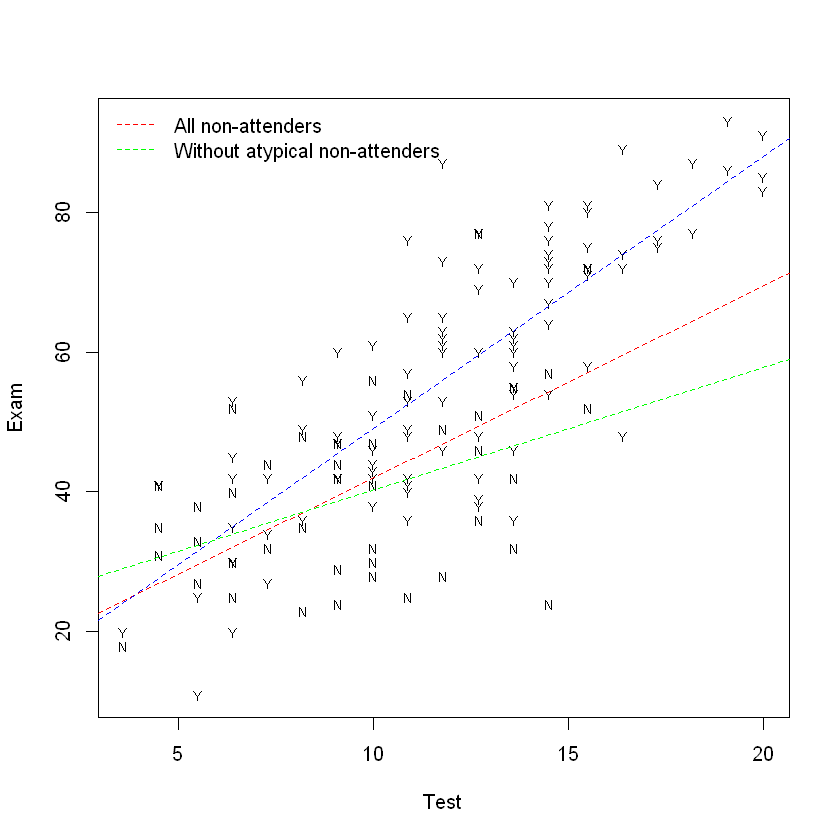

In [22]:
## Plot these data all together
plot(Exam ~ Test, data = Subset.df, pch = substr(Attend, 1, 1), cex = 0.7)

## Remember that we’ve defined b in Slide 26
## Each abline() will have a different colour
abline(b[1:2], lty = 2, col = "red")
abline(b[1] + b[3], b[2] + b[4], lty = 2, col = "blue")

## The fitted line without the 3 atypical points
b2 <- coef(TestAttend.fit3) ## Easier to work with these terms
abline(b2[1:2], lty = 2, col = "green")

## Add a legend to help us differentiate between the lines for non-attenders
legend("topleft",
    legend = c("All non-attenders", "Without atypical non-attenders"),
    lty = 2,
    col = c("red", "green"),
    bty = "n"
)
